This file defines a function visualize() that uses matplotlib to visualize experiments
*   Scatter plot
*   Box plot



# Installing/Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

# %matplotlib inline
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
# stop the pandas indexing/splicing warning from appearing
import warnings
warnings.filterwarnings('ignore')

# Helper Functions

In [3]:
# returns a list of dataframes for each position
def buildPositionDFs(df1, order, sort=['Salary', 'FPTS'], incr=[True, False]):
  # incr determines if the players are each position are sorted by increasing salary
  l1 = []
  for i in order:
    # print(i)
    posDF = df1[df1['Position'] == i]
    posDF.sort_values(sort, ascending=incr, inplace=True)
    posDF.reset_index(inplace=True, drop=True)
    l1.append(posDF)
  return l1

# Scatter Plots for Salary vs FPTS (per position)

In [11]:
df = pd.read_csv('dataset2_splitpositions.csv')

# all the unique dates in the dataset
# dates = df['Date'].unique()

In [5]:
positions = ['PG', 'SG', 'SF', 'PF', 'C', 'G', 'F', 'UTIL']

In [12]:
l1 = buildPositionDFs(df, order=positions)

In [13]:
for i in range(len(l1)):
  print(l1[i].shape)

(12688, 27)
(15057, 27)
(15019, 27)
(13400, 27)
(11930, 27)
(21233, 27)
(22609, 27)
(43482, 27)


In [ ]:
def mplVisualizeScatter(data, paramX, paramY, output=False, xL=None, yL=None, t=None, fname=None):
  x = data[paramX]
  y = data[paramY]

  f, ax = plt.subplots()
  plt.xlim(2500, 13500)
  plt.ylim(-5, 100)
  ax.scatter(x, y, marker = '.', s=1)

  # linear trendline
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)
  ax.plot(x,p(x),"r--")
  ax.text(0.05, 0.9, "Linear: y=%.6fx+%.6f"%(z[0],z[1]), transform = ax.transAxes)

  # quadratic trendline
  z = np.polyfit(x, y, 2)
  p = np.poly1d(z)
  plt.plot(x,p(x),"b--")
  ax.text(0.05, 0.85, "Quadratic: y=%.6fx^2+%.6fx+%.6f"%(z[0],z[1],z[2]), transform = ax.transAxes)

  # cubic trendline
  z = np.polyfit(x, y, 3)
  p = np.poly1d(z)
  plt.plot(x,p(x),"y--")
  ax.text(0.05, 0.8, "Cubic: y=%.6fx^3+%.6fx^2+%.6fx+%.6f"%(z[0],z[1],z[2], z[3]), transform = ax.transAxes)


  if xL:
    plt.xlabel(xL)
  if yL:
    plt.ylabel(yL)
  if t:
    plt.title(t)
  if fname:
    plt.savefig(fname, dpi=1200)
  plt.show()

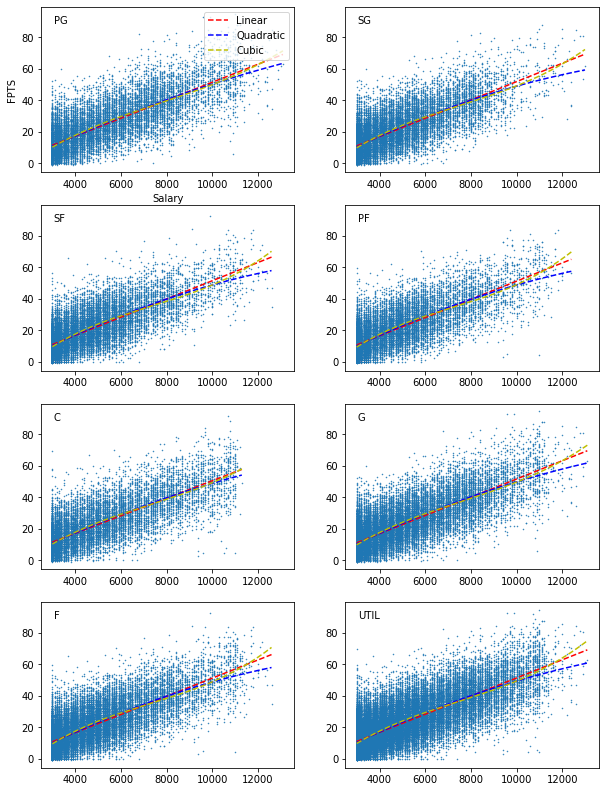

In [17]:
# trying to get them to plot on the same image

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,14), sharex='all', sharey='all')
for data, ax in zip(l1, axs.ravel()):
  position = data['Position'].iloc[0]

  

  x = data['Salary']
  y = data['FPTS']

  ax.scatter(x, y, marker = '.', s=1)
  ax.text(0.05, 0.9, f'{position}', transform = ax.transAxes)
  ax.tick_params(axis='x', labelbottom=True)
  ax.tick_params(axis='y', labelleft=True)

  # linear trendline
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)
  ax.plot(x,p(x),"r--", label='Linear')
  # ax.text(0.05, 0.9, "Linear: y=%.6fx+%.6f"%(z[0],z[1]), transform = ax.transAxes)

  # quadratic trendline
  z = np.polyfit(x, y, 2)
  p = np.poly1d(z)
  ax.plot(x,p(x),"b--", label='Quadratic')
  # ax.text(0.05, 0.85, "Quadratic: y=%.6fx^2+%.6fx+%.6f"%(z[0],z[1],z[2]), transform = ax.transAxes)

  # cubic trendline
  z = np.polyfit(x, y, 3)
  p = np.poly1d(z)
  ax.plot(x,p(x),"y--",label='Cubic')
  # ax.text(0.05, 0.8, "Cubic: y=%.6fx^3+%.6fx^2+%.6fx+%.6f"%(z[0],z[1],z[2], z[3]), transform = ax.transAxes)

  if position == 'PG':
    ax.set_xlabel('Salary')
    ax.set_ylabel('FPTS')
    # ax.legend([l1, l2, l3], ['Linear', 'Quadratic', 'Cubic'])
    ax.legend(loc='upper right')

plt.savefig('fptsVsSal_combined.jpg', dpi=1200, bbox_inches='tight')
plt.show()

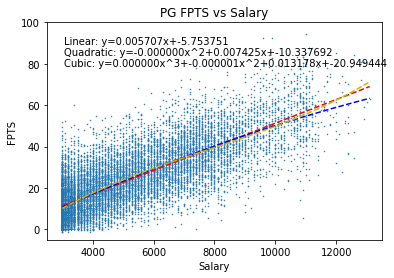

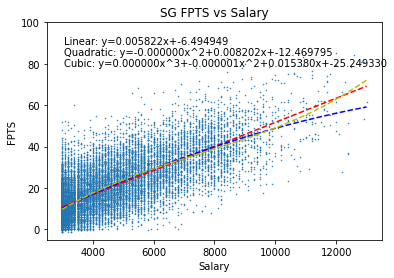

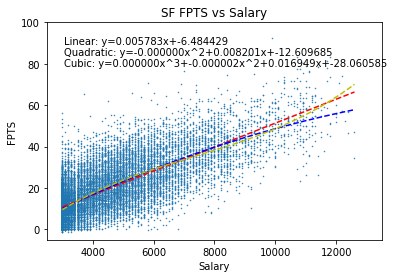

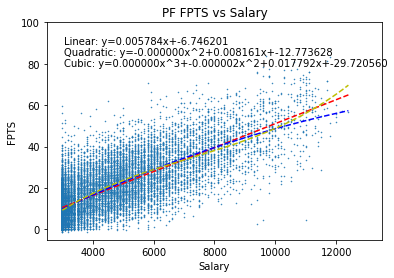

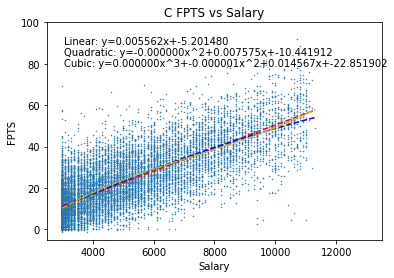

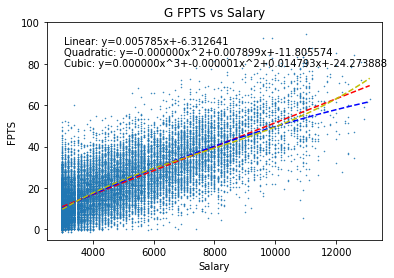

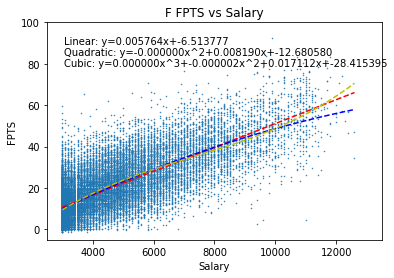

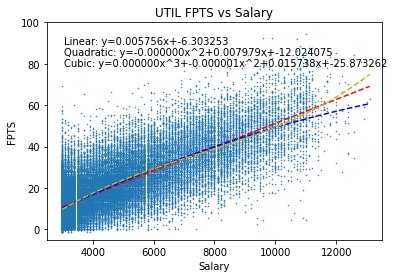

In [ ]:
for i in range(len(l1)):
  pos = positions[i]
  x = 'Salary'
  y = 'FPTS'
  mplVisualizeScatter(l1[i], x, y, xL='Salary', yL='FPTS', t=f'{pos} {y} vs {x}', fname=f'{pos}_fptsVsSal.jpg')

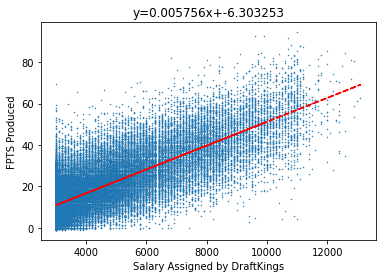

In [ ]:
data = df
x = data['Salary']
y = data['FPTS']
plt.scatter(x, y, marker='.', s=1)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title("y=%.6fx+%.6f"%(z[0],z[1]))
plt.xlabel("Salary Assigned by DraftKings")
plt.ylabel("FPTS Produced")
# plt.title("Salary vs. FPTs Across the Entire Dataset")
plt.savefig('SalvsFPTS.jpg', dpi=300)
plt.show()

# Box Plots for Predicted FPTS vs True Performance

In [ ]:
def mplVisualizeBox(data, output=False, xL=None, yL=None, t=None, fname=None):
  fig, axs = plt.subplots()
  axs.boxplot(data, notch=False, vert=True, sym='')
  plt.xticks([1, 2], ['Predicted', 'Actual'])

  if xL:
    plt.xlabel(xL)
  if yL:
    plt.ylabel(yL)
  if t:
    plt.title(t)
  if fname:
    plt.savefig(fname)
  plt.show()

# x = df['Prediction']
# y = df['Score']
# data = [x, y]
# fig, axs = plt.subplots()
# axs.boxplot(data, notch=False, vert=True, sym='')
# plt.title(title)
# plt.xticks([1, 2], ['Predicted', 'Actual'])
# plt.show()

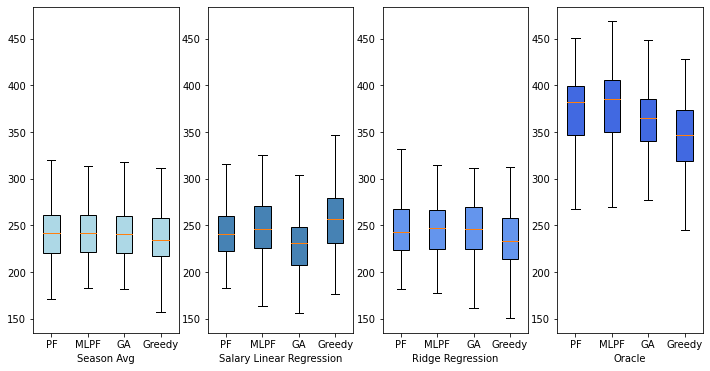

In [ ]:
heuristic = 'seasonAvg'
df1 = pd.read_csv(f'/content/PF_{heuristic}.csv')
df2 = pd.read_csv(f'/content/MLPF_{heuristic}.csv')
df3 = pd.read_csv(f'/content/geneticAlg_{heuristic}.csv')
df4 = pd.read_csv(f'/content/greedy_{heuristic}.csv')

x1 = df1['Score']
x2 = df2['Score']
x3 = df3['FPTS']
x4 = df4['FPTS']
data = [x1, x2, x3, x4]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(12,6), sharey=True)
bplt1 = ax1.boxplot(data, notch=False, vert=True, sym='', labels=['PF', 'MLPF', 'GA', 'Greedy'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
ax1.set_xlabel('Season Avg')

heuristic = 'salary'
df1 = pd.read_csv(f'/content/PF_{heuristic}.csv')
df2 = pd.read_csv(f'/content/MLPF_{heuristic}.csv')
df3 = pd.read_csv(f'/content/geneticAlg_{heuristic}.csv')
df4 = pd.read_csv(f'/content/greedy_{heuristic}.csv')

x1 = df1['Score']
x2 = df2['Score']
x3 = df3['FPTS']
x4 = df4['FPTS']

data = [x1, x2, x3, x4]
bplt2 = ax2.boxplot(data, notch=False, vert=True, sym='', labels=['PF', 'MLPF', 'GA', 'Greedy'], patch_artist=True, boxprops=dict(facecolor='steelblue'))
ax2.set_xlabel('Salary Linear Regression')
ax2.tick_params(axis='y', labelleft=True)

heuristic = 'ridgeReg'
df1 = pd.read_csv(f'/content/PF_{heuristic}.csv')
df2 = pd.read_csv(f'/content/MLPF_{heuristic}.csv')
df3 = pd.read_csv(f'/content/geneticAlg_{heuristic}.csv')
df4 = pd.read_csv(f'/content/greedy_{heuristic}.csv')

x1 = df1['Score']
x2 = df2['Score']
x3 = df3['FPTS']
x4 = df4['FPTS']

data = [x1, x2, x3, x4]
bplt3 = ax3.boxplot(data, notch=False, vert=True, sym='', labels=['PF', 'MLPF', 'GA', 'Greedy'], patch_artist=True, boxprops=dict(facecolor='cornflowerblue'))
ax3.set_xlabel('Ridge Regression')
ax3.tick_params(axis='y', labelleft=True)

heuristic = 'oracle'
df1 = pd.read_csv(f'/content/PF_{heuristic}.csv')
df2 = pd.read_csv(f'/content/MLPF_{heuristic}.csv')
df3 = pd.read_csv(f'/content/geneticAlg_{heuristic}.csv')
df4 = pd.read_csv(f'/content/greedy_{heuristic}.csv')

x1 = df1['Score']
x2 = df2['Score']
x3 = df3['FPTS']
x4 = df4['FPTS']

data = [x1, x2, x3, x4]
bplt4 = ax4.boxplot(data, notch=False, vert=True, sym='', labels=['PF', 'MLPF', 'GA', 'Greedy'], patch_artist=True, boxprops=dict(facecolor='royalblue'))
ax4.set_xlabel('Oracle')
ax4.tick_params(axis='y', labelleft=True)

plt.savefig(f'ptSpread_boxplot.jpg', dpi=1200)

plt.show()


# Avg FPTs Scored (Cheap vs Expensive Players)

In [ ]:
df = pd.read_csv('dataset2_splitpositions.csv')
df.shape

(155418, 27)

In [ ]:
df = df[df['Date'] >= 20201222]
df.sort_values(['Date', 'Salary', 'FPTS'], ascending=[True, True, False], inplace=True, ignore_index=True)

In [ ]:
df['ExpVal'] = df['FPTS']/df['Salary'] * 1000

In [ ]:
df

,Date,Name,Team,Starter,Position,Salary,FPTS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+-,ExpVal
0,20201222,Reggie Perry,Bkn,0,C,3000,6.00,7.77,1,3,...,1,2,1,0,0,0,0,2,-8,2.00000
1,20201222,Reggie Perry,Bkn,0,F,3000,6.00,7.77,1,3,...,1,2,1,0,0,0,0,2,-8,2.00000
2,20201222,Reggie Perry,Bkn,0,PF,3000,6.00,7.77,1,3,...,1,2,1,0,0,0,0,2,-8,2.00000
3,20201222,Reggie Perry,Bkn,0,UTIL,3000,6.00,7.77,1,3,...,1,2,1,0,0,0,0,2,-8,2.00000
4,20201222,Mfiondu Kabengele,LAC,0,C,3000,0.00,0.93,0,0,...,0,0,0,0,0,0,0,0,-2,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76864,20210701,Khris Middleton,Mil,1,F,9400,62.25,44.97,10,20,...,10,13,8,2,1,1,2,26,16,6.62234
76865,20210701,Khris Middleton,Mil,1,G,9400,62.25,44.97,10,20,...,10,13,8,2,1,1,2,26,16,6.62234
76866,20210701,Khris Middleton,Mil,1,SF,9400,62.25,44.97,10,20,...,10,13,8,2,1,1,2,26,16,6.62234
76867,20210701,Khris Middleton,Mil,1,SG,9400,62.25,44.97,10,20,...,10,13,8,2,1,1,2,26,16,6.62234


In [ ]:
positions = ['PG', 'SG', 'SF', 'PF', 'C', 'G', 'F', 'UTIL']

In [ ]:
l1 = buildPositionDFs(df, order=positions)

In [ ]:
l2 = [] # below 4k salary
l3 = [] # above 10k salary
n = 20 # percent

for i in range(len(l1)):
  # could sort by salary and take the top x% of players instead of strict salary values
  p2 = l1[i].copy()
  # p2 = p2[p2['Salary'] <= 4000]
  p2 = p2.sample(frac=1).reset_index(drop=True)
  p2.sort_values(['Salary'], ascending=[True], inplace=True, ignore_index=True)
  p2 = p2.head(int(len(p2)*(n/100)))
  l2.append(p2)

  p3 = l1[i].copy()
  # p3 = p3[p3['Salary'] >= 10000]
  p3 = p3.sample(frac=1).reset_index(drop=True)
  p3.sort_values(['Salary'], ascending=[False], inplace=True, ignore_index=True)
  p3 = p3.head(int(len(p3)*(n/100)))
  l3.append(p3)

  print(l1[i].shape[0], p2.shape[0], p3.shape[0])


6324 1264 1264
7229 1445 1445
6948 1389 1389
6401 1280 1280
6164 1232 1232
10543 2108 2108
10951 2190 2190
22309 4461 4461


In [ ]:
for i in range(len(l1)):
  print(l1[i].shape[0], l2[i].shape[0], l3[i].shape[0])
  print(positions[i], l1[i].ExpVal.mean(), l2[i].ExpVal.mean(), l3[i].ExpVal.mean())

6324 2537 282
PG 4.307528878705273 3.59480760515874 5.124633846727331
7229 3318 46
SG 4.1312158808697275 3.512701159169268 4.965237180696571
6948 3181 80
SF 4.1204814489965385 3.5331581054609855 4.881498116843018
6401 2944 120
PF 4.070664941314955 3.3808238541242353 4.8742798596918995
6164 2672 263
C 4.315024518519799 3.761186416785959 4.928301919995279
10543 4573 294
G 4.200549866521743 3.517630391374771 5.114723210637549
10951 5147 189
F 4.09247195583267 3.467579712749524 4.879165355284818
22309 10161 578
UTIL 4.16977326698377 3.5253557008493606 5.014998607589562


In [ ]:
for i in range(len(l1)):
  print(l1[i].shape[0], l2[i].shape[0], l3[i].shape[0])
  print(positions[i], l1[i].ExpVal.mean(), l2[i].ExpVal.mean(), l3[i].ExpVal.mean())

6324 1264 1264
PG 4.307528878705273 2.983345668299987 4.9161044454338425
7229 1445 1445
SG 4.1312158808697275 2.6838151579417344 4.788102041663407
6948 1389 1389
SF 4.1204814489965385 2.614617927340006 4.703545028615425
6401 1280 1280
PF 4.070664941314955 2.6038411458333335 4.735680548594148
6164 1232 1232
C 4.315024518519799 3.008575094260578 4.8399892886097495
10543 2108 2108
G 4.200549866521743 2.6942701638407702 4.909716263902681
10951 2190 2190
F 4.09247195583267 2.5851978691019784 4.745524608963661
22309 4461 4461
UTIL 4.16977326698377 2.6377180486558536 4.862832722074802
